In [1]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


Training Data: (60000, 28, 28)
Training Labels: (60000,)
Training Data: (10000, 28, 28)
Training Labels: (10000,)


/Users/aymericschneider/opt/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


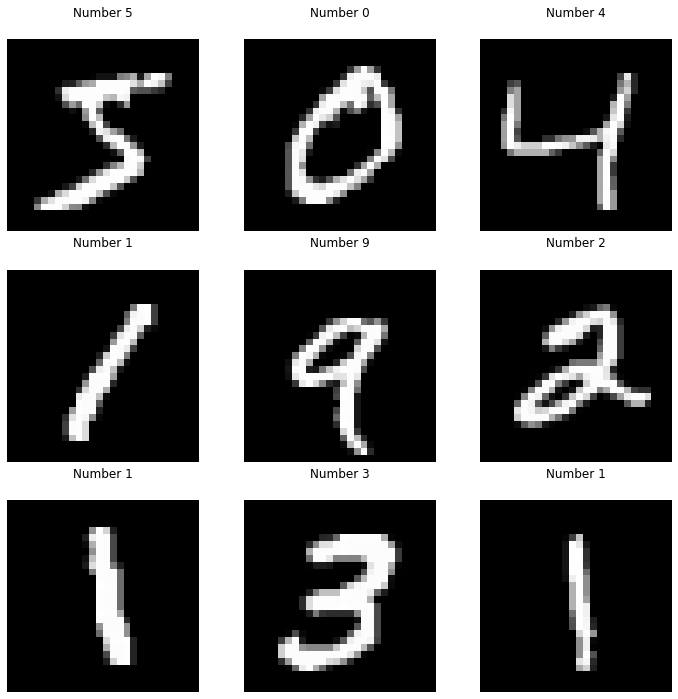

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

#Training Data: (60000L, 28L, 28L)
#Training Labels: (60000L,)

print('Training Data: {}'.format(x_test.shape))
print('Training Labels: {}'.format(y_test.shape))

#Testing Data: (10000L, 28L, 28L)
#Testing Labels: (10000L,)

# EDA

fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))

fig.show()

In [17]:
# convert each image to 1 dimensional array

X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

#(60000L, 784L)
#(784L,)

(60000, 784)
(784,)
